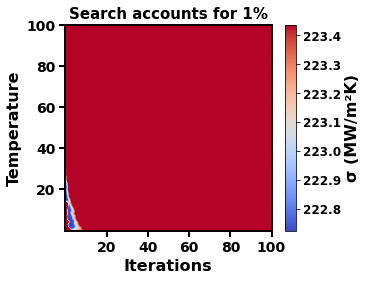

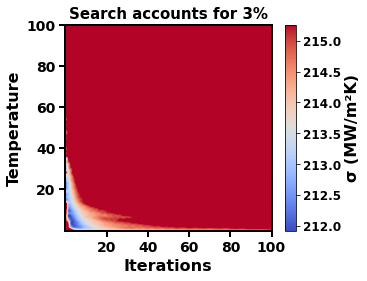

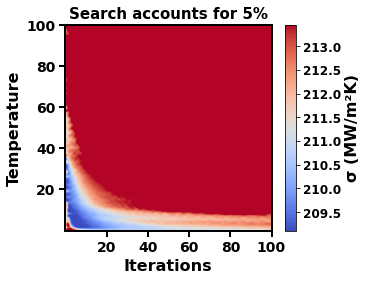

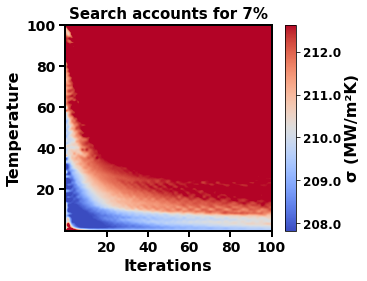

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

csv_name = [
    'mean0.01',#0.01
    'mean0.03',#0.03
    'mean0.05',#0.05
    'mean0.07',#0.07
]

accounts_list = [
    '1%',   #0.01
    '3%',   #0.03
    '5%',   #0.05
    '7%',   #0.07
]

m_set_list = [0.01,0.2,0.5,1.0,2.0]
m_values = [round(num, 2) for num in m_set_list]

n_set_list = np.arange(0.1, 2.01, 0.1)
n_values = [round(num, 2) for num in n_set_list]

quench_set_list = [0.1,0.2,0.3,0.4,0.5,0.65,0.8,1.0,2.0]
quench_values = [round(num, 2) for num in quench_set_list]

def plot_SA(index, csv):

    csvname = csv + '.csv'
    accounts = str(accounts_list[index])
    df = pd.read_csv(csvname, index_col=0)

    T_max = 100
    iter_cycle_range = range(1, 101)

    ITC_temp_list = []
    csv_mean_list = []
    for m in m_values:
        for n in n_values:
            for quench in quench_values:
                ITCresult = df.loc[(df['m'] == m) & (df['n'] == n) & (df['quench'] == quench), 'ITC']
                ITC_mean = np.mean(ITCresult)
                ITC_temp_list.append([ITC_mean])
                csv_mean_list.append([m,n,quench,ITC_mean])

    ITC_min = min(ITC_temp_list)
    ITC_max = max(ITC_temp_list)

    df_mean = pd.DataFrame(csv_mean_list)
    df_mean.columns = ['m', 'n', 'quench', 'ITC_mean']
    
    ##################################################################
    grid_size = 100
    heatmap = np.zeros((grid_size, grid_size))
    count = np.zeros((grid_size, grid_size))

    for m in m_values:
        for quench in quench_values:
            for n in n_values:
                ITCresult = df.loc[(df['m'] == m) & (df['n'] == n) & (df['quench'] == quench), 'ITC']
                ITC_mean = np.mean(ITCresult)
                temperatures = []

                for iter_cycle in iter_cycle_range:
                    c = m * np.exp(-n * quench)
                    T = T_max * np.exp(-c * iter_cycle ** quench)
                    temperatures.append(T)

                for i in range(len(iter_cycle_range)):
                    axis_x = int(iter_cycle_range[i] // 1-1)
                    axis_y = int(temperatures[i] // 1)
                    heatmap[axis_y, axis_x] += ITC_mean
                    count[axis_y, axis_x] += 1
                    
    count[count == 0] = 1
    heatmap /= count
    heatmap = np.where(count == 1, np.nan, heatmap)

    value_list = []
    for col in heatmap:
        for value in col:
            value_list.append(value)

    arr = np.array(value_list)
    max_value = np.nanmax(arr)
    min_value = np.nanmin(arr)
    delta_value = max_value - min_value
    
    for row_index in range(99, -1, -1):
        for col_index in range(99, -1, -1):
            if np.isnan(heatmap[row_index,col_index]):
                heatmap[row_index,col_index] = np.nanmean(heatmap[row_index,:])

    plt.figure(figsize=(5, 3.8))
    plt.imshow(ma.masked_invalid(heatmap[:]), cmap='coolwarm', interpolation='bicubic')
    plt.gca().invert_yaxis()

    plt.clim(vmin=min_value+1, vmax=min_value+delta_value/2.8)
    cbar = plt.colorbar() 

    tick_positions = [float(tick) for tick in cbar.get_ticks()]
    tick_labels = [str('{:.1f}'.format(tick)) for tick in cbar.get_ticks()]

    cbar.set_ticks(tick_positions)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_yticklabels(tick_labels, fontsize=12, fontweight='bold')
    cbar.set_label('σ (MW/m²K)', fontsize=16, fontweight='bold')

    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['right'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.tick_params(axis='both', which='major', width=2, length=6)
    plt.xlabel('Iterations', fontsize=16, fontweight='bold')
    plt.ylabel('Temperature', fontsize=16, fontweight='bold')
    plt.title('Search accounts for '+accounts,fontsize=15, fontweight='bold')
    plt.xticks([20,40,60,80,100], ['20','40','60','80','100'], fontsize=14, fontweight='bold')
    plt.yticks([20,40,60,80,100], ['20','40','60','80','100'], fontsize=14, fontweight='bold')

    plt.savefig(str(index+1)+'gs.jpg', dpi=500, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
for index, csv in enumerate(csv_name):
    plot_SA(index, csv)